<a href="https://colab.research.google.com/github/therealszymek/Tire-Model/blob/main/supervised_machine_training_tire_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following libraries need to be installed to read the provided .DAT Files from the Formula SAE Tire Test Consortium:
```
pip install pandas
```
```
pip install numpy
```
```
pip install glob2
```



In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import glob
from sklearn.model_selection import train_test_split

In [ ]:
def createDataFrame(globbing_data):
    all_data_frames = []
    for one_filename in globbing_data:
        print(f'Loading {one_filename}')
        new_data_frame = pd.read_csv(one_filename, delimiter='\t', skiprows=[0, 2])
        all_data_frames.append(new_data_frame)

    print(f'{len(all_data_frames)} files added.')

    data_frame = pd.concat(all_data_frames)
    print('\ndata frame created:\n')
    return data_frame

In [ ]:
def split_data(data_frame, test_size=0.2, train_size=0.8, random_state=None):
    # Splits data into training and testing sets
    train_data, test_data = train_test_split(data_frame, test_size=test_size, train_size=train_size, random_state=random_state)
    return train_data, test_data

In [ ]:
globbing_data = glob.glob('/content/data/A2356*.dat')

data_frame = createDataFrame(globbing_data)
print(data_frame)

Loading /content/data/A2356raw2.dat
Loading /content/data/A2356raw4.dat
2 files added.

data frame created:

              ET     V     N     SA     IA     RL      RE      P    FX    FY  \
0          0.000  0.02 -0.04  0.007  0.012   7.69  -82.46  11.97  0.47 -6.62   
1          0.010  0.02  0.03 -0.001  0.009   7.69  132.66  11.89  0.63 -6.77   
2          0.020  0.00  0.03 -0.008  0.010   7.69   21.16  11.89  0.73 -6.93   
3          0.030  0.03  0.03  0.004  0.006   7.69  169.82  11.92  0.72 -6.76   
4          0.040  0.02 -0.04 -0.007  0.003   7.69  -82.46  12.00  0.66 -6.75   
...          ...   ...   ...    ...    ...    ...     ...    ...   ...   ...   
127187  1271.839  0.02  0.09  0.012 -0.038  15.76   36.76   9.10 -0.21 -0.35   
127188  1271.849  0.02 -0.11  0.023 -0.038  15.76  -31.45   9.10  0.14 -0.34   
127189  1271.859  0.01 -0.11 -0.003 -0.040  15.76  -22.64   9.09  0.39 -0.33   
127190  1271.869  0.02 -0.04  0.016 -0.025  15.76  -82.46   9.08  0.66 -0.41   
127191  127

In [ ]:
# Partitions data with 20% test data, 80% train
train_data, test_data = split_data(data_frame, test_size=0.2, random_state=42)

print("Original Data Shape:", data_frame.shape)
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)


Original Data Shape: (207053, 21)
Train Data Shape: (165642, 21)
Test Data Shape: (41411, 21)


In [ ]:
groundSpeedVelocity = data_frame['V']
slipAngle = data_frame['SA']
inclinationAngle = data_frame['IA']
tirePressure = data_frame['P']
tireLoad = data_frame['FZ']
slipRatio = []
print('\ninput parameters extracted.')

tireLateralLoad = data_frame['NFY']
tireLongitudinalLoad = data_frame['NFX']
rollingResistance = data_frame['MX']
selfAligningTorque = data_frame['MZ']
print('\noutput parameters extracted.')


input parameters extracted.

output parameters extracted.


In [ ]:
data_frame['N'] = (data_frame['N'] * 2 * np.pi) / 60 #converts wheel rotational speed from RPM to radians/sec
data_frame['RL'] = data_frame['RL'] / 100 #converts loaded radius in cm to m
slip_ratio_values = np.where(data_frame['V'] != 0, (data_frame['N'] * data_frame['RL']) / data_frame['V'], 0)
slipRatio = pd.Series(slip_ratio_values, name='SR')

print('slip ratio finalized:')
print(slipRatio)

slip ratio finalized:
0        -0.016106
1         0.012079
2         0.000000
3         0.008053
4        -0.016106
            ...   
207048    0.074267
207049   -0.090771
207050   -0.181542
207051   -0.033008
207052    0.049512
Name: SR, Length: 207053, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
x_train = np.column_stack((groundSpeedVelocity, slipAngle, inclinationAngle, tirePressure, tireLoad, slipRatio))
y_train = np.column_stack((tireLateralLoad, tireLongitudinalLoad, rollingResistance, selfAligningTorque))

In [ ]:
'''
test_input = []
for i in range(100):
  test_input.push([1, 0, 0, 0, 1, 1])
'''

'\ntest_input = []\nfor i in range(100):\n  test_input.push([1, 0, 0, 0, 1, 1])\n'

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
print(len(x_train), len(y_train))

207053 207053


In [ ]:
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
6471/6471 [==============================] - 15s 2ms/step - loss: 92.9962
Epoch 2/15
6471/6471 [==============================] - 13s 2ms/step - loss: 27.6766
Epoch 3/15
6471/6471 [==============================] - 13s 2ms/step - loss: 23.0827
Epoch 4/15
6471/6471 [==============================] - 13s 2ms/step - loss: 21.0401
Epoch 5/15
6471/6471 [==============================] - 14s 2ms/step - loss: 20.2710
Epoch 6/15
6471/6471 [==============================] - 13s 2ms/step - loss: 19.8461
Epoch 7/15
6471/6471 [==============================] - 13s 2ms/step - loss: 19.7047
Epoch 8/15
6471/6471 [==============================] - 14s 2ms/step - loss: 19.5342
Epoch 9/15
6471/6471 [==============================] - 13s 2ms/step - loss: 19.4799
Epoch 10/15
6471/6471 [==============================] - 13s 2ms/step - loss: 19.3569
Epoch 11/15
6471/6471 [==============================] - 13s 2ms/step - loss: 19.2627
Epoch 12/15
6471/6471 [==============================] - 13s 2m

In [ ]:
##predictions = model.predict(test_input)
# Graph predictions against the actual data

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(f"Shape of x_train: {x_train[:,0].shape}")
print(f"Shape of y_train: {y_train[:,0].shape}")

Shape of x_train: (207053,)
Shape of y_train: (207053,)


fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(slipAngle, slipAngle, tireLongitudinalLoad)
plt.show()

In [ ]:
# Compare test data to train data
# Calculate summary statistics
train_summary = train_data.describe()
test_summary = test_data.describe()

# Print summary statistics
print("Summary Statistics - Training Data:")
print(train_summary)
print("\nSummary Statistics - Testing Data:")
print(test_summary)

Summary Statistics - Training Data:
                  ET              V              N             SA  \
count  165642.000000  165642.000000  165642.000000  165642.000000   
mean      544.372952      16.529899       0.033783       0.081303   
std       341.553450      11.361005       0.065476       3.802343   
min         0.000000      -0.920000      -0.250000     -12.022000   
25%       258.232500       1.970000      -0.040000      -0.011000   
50%       517.469000      24.950000       0.030000       0.000000   
75%       775.780500      24.980000       0.090000       0.013000   
max      1271.849000      25.180000       0.300000      12.028000   

                  IA             RL             RE              P  \
count  165642.000000  165642.000000  165642.000000  165642.000000   
mean        0.972390       7.728445   36092.578998      11.643391   
std         1.514425       0.554006   80411.220054       1.277456   
min        -5.017000       7.050000 -100079.920000       5.950000 

In [ ]:
'''
import matplotlib.pyplot as plt

# sa_list = np.linspace(-15, 15, num = 30000, endpoint = True)
sa_list = np.arange(-15, 15, 0.01)

slip_angle_values = []
tireLoad_values = []
lateral_force_values = []

slipAngle.reset_index(drop=True, inplace=True)
tireLateralLoad.reset_index(drop=True, inplace=True)
tireLoad.reset_index(drop=True, inplace=True)

for sa_value in sa_list:
  closest_index = np.argmin(np.abs(slipAngle - sa_value))
  slip_angles = slipAngle[closest_index:closest_index+1]  # Extracting a single value as a list
  lateral_forces = tireLateralLoad[closest_index:closest_index+1]  # Extracting a single value as a list
  tire_loads = tireLoad[closest_index:closest_index+1]  # Extracting a single value as a list

  slip_angle_values.extend(slip_angles)
  lateral_force_values.extend(lateral_forces)
  tireLoad_values.extend(tire_loads)

print("Slip Angle Values:", slip_angle_values)
print("Lateral Force Values:", lateral_force_values)
print("Tire Loads:", tireLoad_values)
'''

Slip Angle Values: [-12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025, -12.025,

In [ ]:
'''
dataSlipAngle = {
    'Slip Angle': slip_angle_values,
    'Lateral Force': lateral_force_values,
    'Tire Load': tireLoad_values
}
SA = pd.DataFrame(dataSlipAngle)
fSA = SA.drop_duplicates(subset=['Slip Angle'])
foSA = fSA.sort_values(by='Slip Angle')

print(foSA)
'''

In [ ]:
'''
#sr_list = np.arange(-5, 5, 0.001)
sr_list = np.linspace(-5, 5, num = 30000)

slipRatio_values = []
tireLoad_values = []
longitudinalLoad_values = []

slipRatio.reset_index(drop=True, inplace=True)
tireLoad.reset_index(drop=True, inplace=True)
tireLongitudinalLoad.reset_index(drop=True, inplace=True)

for sr_value in sa_list:
  closest_index = np.argmin(np.abs(slipRatio - sr_value))
  slip_ratios = slipAngle[closest_index:closest_index+1]  # Extracting a single value as a list
  tire_loads = tireLateralLoad[closest_index:closest_index+1]  # Extracting a single value as a list
  longitudinal_loads = tireLoad[closest_index:closest_index+1]  # Extracting a single value as a list

  slipRatio_values.extend(slip_ratios)
  tireLoad_values.extend(tire_loads)
  longitudinalLoad_values.extend(longitudinal_loads)
  '''

      Slip Angle  Lateral Force  Tire Load
0        -12.025        -2.5015    -243.64
298      -12.020        -2.6538     -44.67
299      -12.010        -1.9657    -249.11
300      -12.000        -1.9525    -250.01
301      -11.990        -2.4326    -246.33
...          ...            ...        ...
2699      11.990         2.3886    -255.28
2700      12.000         1.9861    -253.60
2701      12.010         2.0037    -251.40
2702      12.020         2.3291    -257.02
2703      12.028         2.3351    -254.90

[2407 rows x 3 columns]


In [ ]:
'''
SRdata = {
    'Slip Ratio': slipRatio_values,
    'Tire Load': tireLoad_values,
    'Longitudinal Load': longitudinalLoad_values
}
SR = pd.DataFrame(SRdata)
fSR = SR.drop_duplicates(subset=['Slip Ratio'])
foSR = fSR.sort_values(by='Slip Ratio')
print(len(SR))
'''

3000


In [ ]:
'''
_list = np.arange(-5, 5, 0.001)
tl_list = tireLoad_values

slipRatio_values = []
tireLoad_values = []
longitudinalLoad_values = []

slipRatio.reset_index(drop=True, inplace=True)
tireLoad.reset_index(drop=True, inplace=True)
tireLongitudinalLoad.reset_index(drop=True, inplace=True)

for tl_value in tl_list:
  closest_index = np.argmin(np.abs(slipRatio - sr_value))
  slip_ratios = slipAngle[closest_index:closest_index+1]  # Extracting a single value as a list
  tire_loads = tireLateralLoad[closest_index:closest_index+1]  # Extracting a single value as a list
  longitudinal_loads = tireLoad[closest_index:closest_index+1]  # Extracting a single value as a list

  slipRatio_values.extend(slip_ratios)
  tireLoad_values.extend(tire_loads)
  longitudinalLoad_values.extend(longitudinal_loads)
  '''

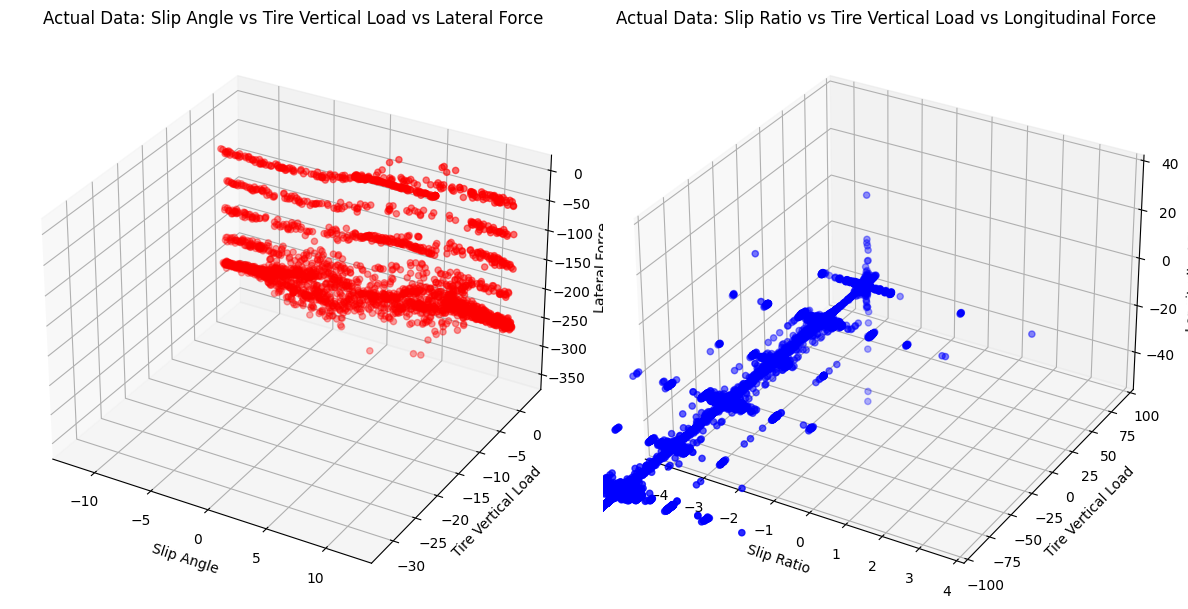

3000 3000 3000


In [ ]:
'''
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')

ax1.scatter(foSA['Slip Angle'], foSA['Lateral Force'], foSA['Tire Load'], c='r', marker='o')

ax1.set_xlabel('Slip Angle')
ax1.set_ylabel('Tire Vertical Load')
ax1.set_zlabel('Lateral Force')
ax1.set_title('Actual Data: Slip Angle vs Tire Vertical Load vs Lateral Force')

# Plot for actual data (Slip Ratio, Vertical Load, Longitudinal Force)
ax2 = fig.add_subplot(122, projection='3d')

# Plotting the actual data points
ax2.scatter(data_frame['SR'], data_frame['FZ'], data_frame['NFX'], c='b', marker='o')
ax2.set_ylim([-100, 100])

ax2.set_xlabel('Slip Ratio')
ax2.set_ylabel('Tire Vertical Load')
ax2.set_zlabel('Longitudinal Force')
ax2.set_title('Actual Data: Slip Ratio vs Tire Vertical Load vs Longitudinal Force')

plt.tight_layout()
plt.show()

print(len(SR['Slip Ratio']), len(SR['Tire Load']), len(SR['Longitudinal Load']))
'''